<a href="https://colab.research.google.com/github/Deviprasad21/MACHINE-LEARNING-USING-PYTHON/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.63

Confusion Matrix:
[[12  5]
 [ 6  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.58      0.54      0.56        13

    accuracy                           0.63        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30



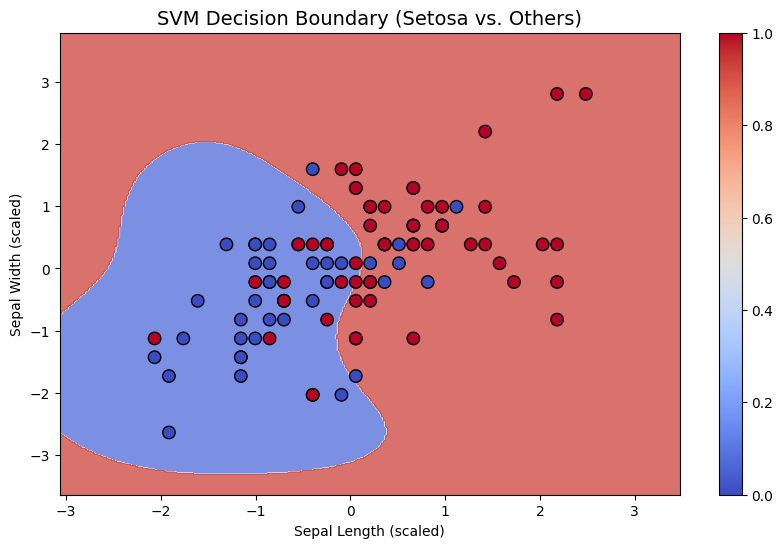

In [2]:
# SVM Dual Problem with RBF Kernel and Plotting on Iris Dataset

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only sepal length and sepal width for 2D plot
y = iris.target

# Filter for binary classification (Setosa vs. other)
X_binary = X[y != 0]
y_binary = y[y != 0]
y_binary = np.where(y_binary == 1, 0, 1)  # Setosa = 0, others = 1

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_binary)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

# Initialize SVM classifier with RBF kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

# Create a meshgrid for plotting decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over the grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_binary, edgecolors='k', marker='o', s=80, cmap=plt.cm.coolwarm)
plt.title("SVM Decision Boundary (Setosa vs. Others)", fontsize=14)
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.colorbar()
plt.show()
